# I. Project

- **Student name:** Isiah Cruz
- **Student pace:** Part-Time
- **Flatiron project review date:** August 24, 2020
- **Instructor name:** Eli Thomas
- **Module:** 3


- **Dataset:** Telecom Churn Dataset
    - https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

# II. Importing

In [1]:
#import the packages that we will need for the project

import xgboost as xgb
%matplotlib inline
from IPython.display import Image
from imblearn.over_sampling import SMOTE
from pydotplus import graph_from_dot_data
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, recall_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import itertools
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import statsmodels.api as sm
import warnings
import xgboost as xgb
plt.style.use('ggplot')
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [2]:
#import the dataset

df = pd.read_csv('bigml_59c28831336c6604c800002a 2.csv')

# III. Data Preparation

## A) CLEANING

### Let's start by examining the dataset.

In [3]:
#Examine the first 5 rows of data

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Emamine the shape of the dataset

print('Rows:', df.shape[0])
print('Columnss:', df.shape[1])

Rows: 3333
Columnss: 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

### Now that we have a sense of how big the dataset is, let's start examining it.

### Removing inconsistencies, duplicates, etc will ultimately help us create a machine learning model that can accurately predict what we are looking for.

In [6]:
#Check for missing values

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### The dataset does not seem to have any missing values.

In [7]:
#Check for duplicates

dups = df.duplicated()
print(dups.any())

False


### The dataset does not seem to have any duplicate values.

In [8]:
#Remove columns that we won't need for our models

df = df.drop(['phone number'],axis=1)
df = df.drop(['state'],axis=1)
df = df.drop(['area code'],axis=1)

### Now that the 'phone number' column has been dropped, we can focus only on the columns that will be consequential for our model.

In [9]:
#Examine the first 5 rows of data

df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 

In [10]:
df.insert(0, 'ID', range(0, 0 + len(df)))
df

,ID,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Let's clean up the naming of our columns for uniformity & spacing.

In [11]:
#Rename the columns

df = df.rename(columns={'account length': 'Length', 'international plan': 'International',
                   'voice mail plan': 'Voicemail', 'number vmail messages': 'Voicemail Messages', 'total day minutes': 'Daytime Mins',
                   'total day calls': 'Daytime Calls', 'total day charge': 'Daytime Charge', 'total eve minutes': 'Evening Mins',
                   'total eve calls': 'Evening Calls', 'total eve charge': 'Evening Charge', 'total night minutes': 'Nighttime Mins',
                   'total night calls': 'Nighttime Calls', 'total night charge': 'Nighttime Charge', 'total intl minutes': 'Intl Mins',
                   'total intl calls': 'Intl Calls', 'total intl charge': 'Intl Charge' ,'customer service calls': 'Customer Service Calls',
                   'churn': 'Churn'})

### We should also check to see if there are any irregularities with the datatypes of our columns.

In [12]:
#Check on the data types of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
ID                        3333 non-null int64
Length                    3333 non-null int64
International             3333 non-null object
Voicemail                 3333 non-null object
Voicemail Messages        3333 non-null int64
Daytime Mins              3333 non-null float64
Daytime Calls             3333 non-null int64
Daytime Charge            3333 non-null float64
Evening Mins              3333 non-null float64
Evening Calls             3333 non-null int64
Evening Charge            3333 non-null float64
Nighttime Mins            3333 non-null float64
Nighttime Calls           3333 non-null int64
Nighttime Charge          3333 non-null float64
Intl Mins                 3333 non-null float64
Intl Calls                3333 non-null int64
Intl Charge               3333 non-null float64
Customer Service Calls    3333 non-null int64
Churn                     3333 non-null bool
dt

### Good thing we checked! It looks like the 'Churn' column (which will also be our target variable) is formatted at a bool so let's convert it to an integer since we want it to function in an almost binary way.

In [13]:
#Convert the datatype of the column

df['Churn'] = df['Churn'].astype('int')

In [14]:
#Check on the data types of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
ID                        3333 non-null int64
Length                    3333 non-null int64
International             3333 non-null object
Voicemail                 3333 non-null object
Voicemail Messages        3333 non-null int64
Daytime Mins              3333 non-null float64
Daytime Calls             3333 non-null int64
Daytime Charge            3333 non-null float64
Evening Mins              3333 non-null float64
Evening Calls             3333 non-null int64
Evening Charge            3333 non-null float64
Nighttime Mins            3333 non-null float64
Nighttime Calls           3333 non-null int64
Nighttime Charge          3333 non-null float64
Intl Mins                 3333 non-null float64
Intl Calls                3333 non-null int64
Intl Charge               3333 non-null float64
Customer Service Calls    3333 non-null int64
Churn                     3333 non-null int64
d

### Success — our datatypes look sensical & consistent!

### Now that this is done, we can move on to converting some our data into categorical data.

## B) CONVERTING TO CATEGORICAL

In [15]:
#Check for the number of unique values

df.nunique()

ID                        3333
Length                     212
International                2
Voicemail                    2
Voicemail Messages          46
Daytime Mins              1667
Daytime Calls              119
Daytime Charge            1667
Evening Mins              1611
Evening Calls              123
Evening Charge            1440
Nighttime Mins            1591
Nighttime Calls            120
Nighttime Charge           933
Intl Mins                  162
Intl Calls                  21
Intl Charge                162
Customer Service Calls      10
Churn                        2
dtype: int64

### As we can see above, our 'International', 'Voicemail', and 'Churn' columns have only 2 unique values and should therefore be categorical / binary.

In [16]:
#Examine the unique values of the column

df['International'].value_counts()

no     3010
yes     323
Name: International, dtype: int64

In [17]:
#Convert the text responses to numbers using the map function

df['International'] = df['International'].map({'yes': 1, 'no': 0})

In [18]:
#Check to see if the function was effective

df['International'].value_counts()

0    3010
1     323
Name: International, dtype: int64

In [19]:
#Examine the unique values of the column

df['Voicemail'].value_counts()

no     2411
yes     922
Name: Voicemail, dtype: int64

In [20]:
#Convert the text responses to numbers using the map function

df['Voicemail'] = df['Voicemail'].map({'yes': 1, 'no': 0})

In [21]:
#Check to see if the function was effective

df['Voicemail'].value_counts()

0    2411
1     922
Name: Voicemail, dtype: int64

In [22]:
df['Churn'].value_counts()

#Examine the unique values of the column

0    2850
1     483
Name: Churn, dtype: int64

### Our 'International' and 'Voicemail' columns have been successfully converted and it looks like our 'Churn' column is already good to go. Let's move on to checking for outliers!

## C) OUTLIERS

### Our first step is to visualize a few columns to see if there are any outliers.

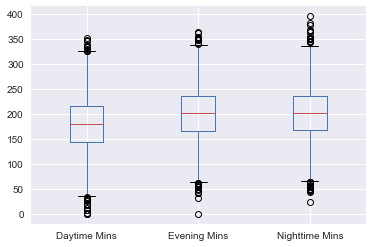

In [23]:
df.boxplot(['Daytime Mins', 'Evening Mins' , 'Nighttime Mins'])

#visualize the distribution of the column

### As we can see, there are a good number of outliers in the columns that have to do with call times / mins. Let's look at a few more.

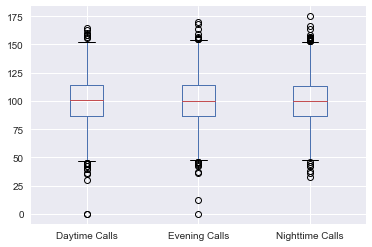

In [24]:
df.boxplot(['Daytime Calls', 'Evening Calls' , 'Nighttime Calls'])

#visualize the distribution of the column

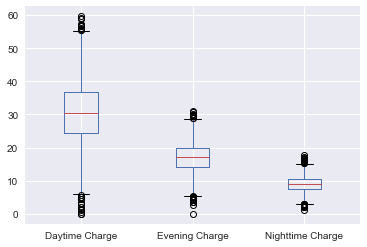

In [25]:
df.boxplot(['Daytime Charge', 'Evening Charge' , 'Nighttime Charge'])

#visualize the distribution of the column

### Now that we have confirmed that there are pretty much outliers across the board, let's write code that strips the outliers from the relevant columns.

### We can determine what is "relevant" by excluding categorical columns that have binary distributions that may be flagged as outliers.

In [26]:
df2 = df.drop(columns=['International', 'Voicemail', 'Customer Service Calls', 'Churn'])

#drop the columns and create a new dataset

### Use IQR and quantiles to remove outliers from the dataset.

In [27]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#split the new dataset into quantiles and calculate IQR

ID                    1666.00
Length                  53.00
Voicemail Messages      20.00
Daytime Mins            72.70
Daytime Calls           27.00
Daytime Charge          12.36
Evening Mins            68.70
Evening Calls           27.00
Evening Charge           5.84
Nighttime Mins          68.30
Nighttime Calls         26.00
Nighttime Charge         3.07
Intl Mins                3.60
Intl Calls               3.00
Intl Charge              0.97
dtype: float64


In [28]:
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

#remove the outliers using IQR

### Check to see if it worked...

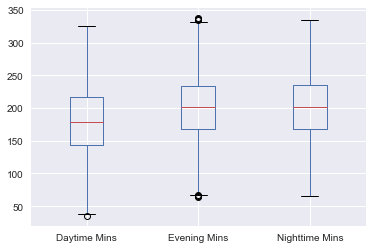

In [29]:
df2.boxplot(['Daytime Mins', 'Evening Mins' , 'Nighttime Mins'])

#visualize the distribution of the column

### Awesome — it worked!

### We can now merge our outlier-free dataset with the columns that we dropped earlier.

In [30]:
df3 = df.drop(columns=['Length', 'Voicemail Messages', 'Daytime Mins', 'Daytime Calls', 'Daytime Charge',
                       'Evening Mins', 'Evening Calls', 'Evening Charge', 'Nighttime Mins', 'Nighttime Calls',
                       'Nighttime Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge'])

#create a new datset set without the outlier-free columns

In [31]:
df = pd.merge(df2, df3, on='ID', how='inner')

#merge our 2 datasets with 'ID' as our index

In [32]:
df.head()

#examine the first 5 rows of data

,ID,Length,Voicemail Messages,Daytime Mins,Daytime Calls,Daytime Charge,Evening Mins,Evening Calls,Evening Charge,Nighttime Mins,Nighttime Calls,Nighttime Charge,Intl Mins,Intl Calls,Intl Charge,International,Voicemail,Customer Service Calls,Churn
0,0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0,1,1,0
1,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0,1,1,0
2,2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,1,0,3,0
4,5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,1,0,0,0


### Our dataset is now back in business and outlier-free!

# IV. Data Exploration

### Let's start by taking a look at Churn (our target variable).

## A) Churn

### We can start by visualizing the distributions of churned & non-churned customers

In [33]:
colors = plotly.colors.DEFAULT_PLOTLY_COLORS
churn_dict = {0: "no churn", 1: "churn"}

In [34]:
y = df["Churn"].value_counts()

data = [go.Bar(x=[churn_dict[x] for x in y.index], y=y.values, marker = dict(color = colors[:len(y.index)]))]
layout = go.Layout(
    title='Churn Distribution',
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(
        title='Customers',
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar15')

print("Number of churned customers:", df["Churn"].value_counts()[1])
print("Number of loyal customers:", df["Churn"].value_counts()[0])

#visualizing the churn distribution using value_counts

Number of churned customers: 434
Number of loyal customers: 2619


In [35]:
churned = df[df.Churn > 0]
churned.head(n=10)

#create a dataframe showing only churned customers

,ID,Length,Voicemail Messages,Daytime Mins,Daytime Calls,Daytime Charge,Evening Mins,Evening Calls,Evening Charge,Nighttime Mins,Nighttime Calls,Nighttime Charge,Intl Mins,Intl Calls,Intl Charge,International,Voicemail,Customer Service Calls,Churn
7,10,65,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,0,0,4,1
17,21,77,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,0,0,5,1
27,33,12,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,0,0,1,1
41,48,119,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,0,0,5,1
47,54,87,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,0,0,5,1
50,57,121,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,0,1,3,1
61,69,150,0,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,13.8,3,3.73,0,0,4,1
68,76,82,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0,0,0,1
69,77,144,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,0,0,4,1
76,84,106,0,210.6,96,35.80,249.2,85,21.18,191.4,88,8.61,12.4,1,3.35,0,0,2,1


In [36]:
churned[['Length','Voicemail Messages','Daytime Mins', 'Daytime Calls', 'Daytime Charge',
         'Evening Mins', 'Evening Calls', 'Evening Charge', 'Nighttime Mins', 'Nighttime Calls',
         'Nighttime Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'International', 'Voicemail',
        'Customer Service Calls']].mean()

Length                    101.405530
Voicemail Messages          5.317972
Daytime Mins              204.107143
Daytime Calls             101.928571
Daytime Charge             34.698641
Evening Mins              210.737788
Evening Calls              99.928571
Evening Charge             17.912811
Nighttime Mins            205.570968
Nighttime Calls           100.264977
Nighttime Charge            9.250760
Intl Mins                  10.679493
Intl Calls                  3.912442
Intl Charge                 2.884009
International               0.278802
Voicemail                   0.172811
Customer Service Calls      2.285714
dtype: float64

### Now that we have taken a look at Churn, A simple heatmap will show us the correlation between 'Churn' and other variables in our phone plan

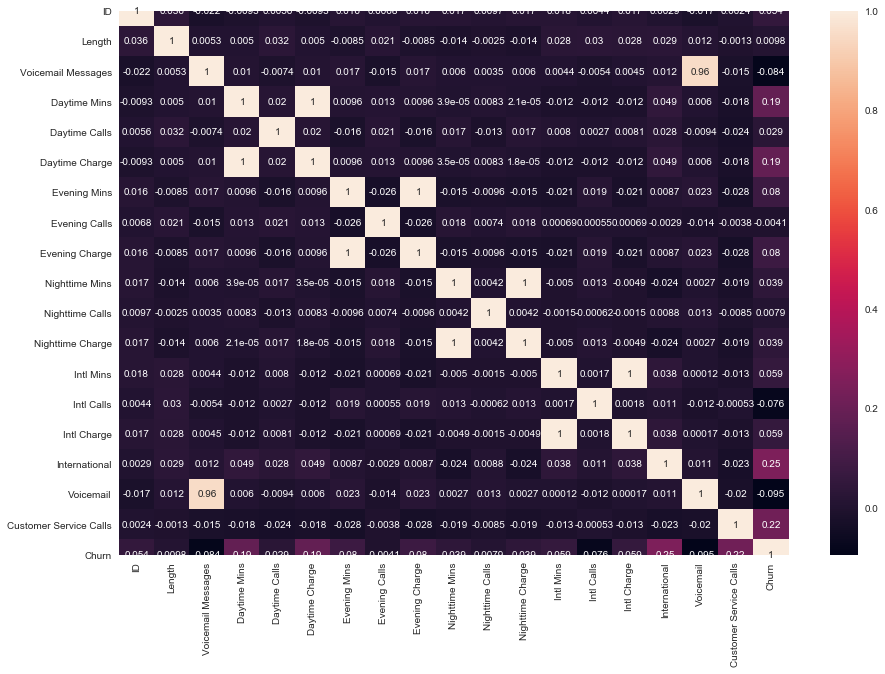

In [45]:
plt.figure(figsize=(15, 10)) #set the size of the visualization
sns.heatmap(df.corr(), annot=True) #plot a heatmap of the correlations

### As we can see according to the 'Churn' column, 'Daytime Mins', 'Daytime Charge', 'International', and 'Customer Service Calls' seem to be the most influential factors on churn rate.

## B) Time of Day

In [107]:
daytime_mins = df['Daytime Mins'].sum(axis=0)
daytime_calls = df['Daytime Calls'].sum(axis=0)
daytime_charge = df['Daytime Charge'].sum(axis=0)
evening_mins = df['Evening Mins'].sum(axis=0)
evening_calls = df['Evening Calls'].sum(axis=0)
evening_charge = df['Evening Charge'].sum(axis=0)
nighttime_mins = df['Nighttime Mins'].sum(axis=0)
nighttime_calls = df['Nighttime Calls'].sum(axis=0)
nighttime_charge = df['Nighttime Charge'].sum(axis=0)

In [108]:
sums = {'Time of Day': ['Daytime','Evening','Nighttime'], 'Mins': [daytime_mins, evening_mins, nighttime_mins], 'Calls': [daytime_calls, evening_calls, nighttime_calls], 'Charge': [daytime_charge, evening_charge, nighttime_charge]}

In [109]:
mins= pd.DataFrame(data=sums)
mins

,Time of Day,Mins,Calls,Charge
0,Daytime,549142.1,307007,93355.82
1,Evening,613938.3,305673,52185.43
2,Nighttime,613394.8,304980,27602.99


In [37]:
mins.plot.bar('Time of Day') #visualize this distribution in the form of a bar graph
plt.title('')

NameError: name 'mins' is not defined

## C) Customer Service Calls

In [130]:
churned['Customer Service Calls'].value_counts()

1    103
0     82
2     80
4     71
3     40
5     36
6     14
7      5
9      2
8      1
Name: Customer Service Calls, dtype: int64

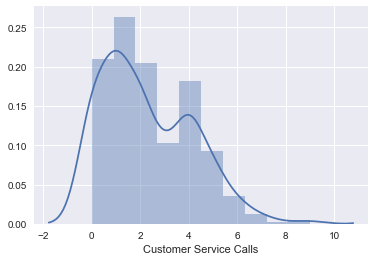

In [129]:
sns.distplot(churned['Customer Service Calls'], bins=10)

# V. Machine Learning (ML) Models Pre-Processing:

### Let's start prepping our model for work, starting with identifying our target variable and running our train-test-split.

- Preprocessing:

In [102]:
X = df.drop('Churn', axis=1, inplace=False)
y = df['Churn']

#separate the target variable from the data

- Train-Test-Split:

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#split our data for training and testing

### We can now build a simple linear regression model that we can use to measure the improvement of our model.

## A) Linear Regression Model

In [104]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
yhat_train = linreg.predict(X_train)

lm = LinearRegression()
train_mse = mean_squared_error(y_train, yhat_train)
train_mse

#train the linear regression model

0.10143781986963062

In [105]:
predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors_int.astype(float)).fit()
model.summary()

#examine the model using OLS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     23.79
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           2.00e-72
Time:                        20:37:08   Log-Likelihood:                -628.98
No. Observations:                2289   AIC:                             1296.
Df Residuals:                    2270   BIC:                             1405.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4662      0.084     -5.571      0.000      -0.630      -0.302
ID                      1.605e-05   7.07e-06      2.272      0.023     2.2e-06    2.99e-05
Length                 -3.476e-05      0.000     -0.201      0.840      -0.000       0.000
Voicemail Messages         0.0030      0.002      1.745      0.081      -0.000       0.006
Daytime Mins               0.7030      0.395      1.779      0.075      -0.072       1.478
Daytime Calls              0.0004      0.000      1.135      0.256      -0.000       0.001
Daytime Charge            -4.1290      2.324     -1.777      0.076      -8.686       0.428
Evening Mins               0.1137      0.196      0.579      0.563      -0.272       0.499
Evening Calls              0.0002      0.000      0.506      0.613      -0.001       0.001
Evening Charge            -1.3311      2.311     -0.576      0.565      -5.863       3.201
Nighttime Mins            -0.0471      0.106     -0.443      0.658      -0.256       0.161
Nighttime Calls            0.0002      0.000      0.461      0.645      -0.001       0.001
Nighttime Charge           1.0563      2.364      0.447      0.655      -3.579       5.691
Intl Mins                 -0.4547      0.627     -0.725      0.469      -1.685       0.775
Intl Calls                -0.0125      0.003     -3.886      0.000      -0.019      -0.006
Intl Charge                1.7112      2.323      0.737      0.461      -2.844       6.267
International              0.2703      0.023     11.946      0.000       0.226       0.315
Voicemail                 -0.1647      0.052     -3.162      0.002      -0.267      -0.063
Customer Service Calls     0.0592      0.005     11.724      0.000       0.049       0.069
==============================================================================
Omnibus:                      614.204   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1269.188
Skew:                           1.591   Prob(JB):                    2.51e-276
Kurtosis:                       4.785   Cond. No.                     7.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### A good practice with classification problems is to check for class imbalances which could create inaccurate predictions further down the line. So let's check for class imbalances...

## B) Class Imbalance Check

### First we will run a value count function, which tells us if any of the values are imbalanced.

In [106]:
# Training set
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

0    1968
1     321
Name: Churn, dtype: int64


0    651
1    113
Name: Churn, dtype: int64


### 

## C) Class Imbalance Fix

In [111]:
# Previous original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

0    1968
1     321
Name: Churn, dtype: int64


1    1968
0    1968
Name: Churn, dtype: int64


# VI. ML Models

## Model #1: XGBoost

In [141]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [142]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [143]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [144]:
xgb_model = xgb.train(param, D_train, steps)

In [145]:
preds = xgb_model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8698143236074272
Recall = 0.8658668862447254
Accuracy = 0.8641221374045801


In [146]:
xgb_acc = accuracy_score(y_test, best_preds)
xgb_acc

0.8641221374045801

## Model #2: Gridsearch CV 

- Create a baseline model:

In [147]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 83.73%


- Grid Search (Decision Trees):

In [148]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,3,4,5,6]
}

In [149]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f'Grid Search will have to search through {num_decision_trees} different permutations.')

Grid Search will have to search through 648 different permutations.


In [150]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

- Best parameters examination:

In [151]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 81.80%
Mean Test Score: 86.11%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

- Random Forests:

In [152]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 91.01%


In [153]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [154]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 90.00%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [155]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.8610687022900764
Random forest grid search:  0.9


## Model #3: Gradient Boosting Classifier

In [156]:
# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [157]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [158]:
# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [164]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')



Model: Gradient Boosted Trees
Accuracy: 0.8859470468431772
F1-Score: 0.8768554150632215

Model: Gradient Boosted Trees
Accuracy: 0.8816793893129771
F1-Score: 0.8788115715402659


In [165]:
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')

print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')


Model: Gradient Boosted Trees
Accuracy: 0.8859470468431772
F1-Score: 0.8768554150632215

Model: Gradient Boosted Trees
Accuracy: 0.8816793893129771
F1-Score: 0.8788115715402659


In [166]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[593,  44],
       [111, 562]])

In [167]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       637
           1       0.93      0.84      0.88       673

    accuracy                           0.88      1310
   macro avg       0.88      0.88      0.88      1310
weighted avg       0.89      0.88      0.88      1310



In [168]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())
# Expected Output: 0.7591715474068416

Mean GBT Cross-Val Score (k=5):
0.8895709801185909


In [169]:
gbt_acc = accuracy_score(y_test, gbt_clf_test_preds)
gbt_acc

0.8816793893129771

# Model #4: Tree Ensembles

- Building a baseline:

In [170]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

- Feature Importance:

In [171]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.17546606, 0.10615998, 0.        ,
       0.23945653, 0.03340523, 0.00955779, 0.03382524, 0.00169128,
       0.00507385, 0.01160503, 0.00227782, 0.01476028, 0.00601362,
       0.01666891, 0.14088579, 0.20315258])

- Model performance:

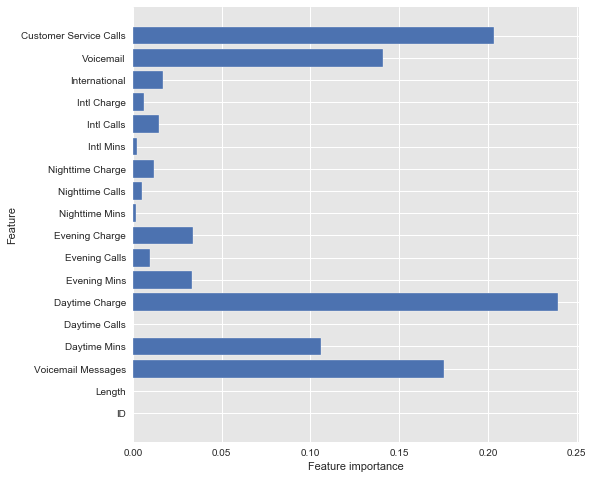

In [172]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [173]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[568  69]
 [169 504]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       637
           1       0.88      0.75      0.81       673

    accuracy                           0.82      1310
   macro avg       0.83      0.82      0.82      1310
weighted avg       0.83      0.82      0.82      1310



In [174]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 81.83%


In [175]:
dt_ensemble_acc = (accuracy_score(y_test, pred))
dt_ensemble_acc

0.8183206106870229

In [176]:
dt_ensemble_acc

0.8183206106870229

# Model #4A: Bagged Trees

In [177]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [178]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [179]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.8561608961303462

In [180]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.8450381679389313

In [181]:
bt_score = bagged_tree.score(X_test, y_test)
bt_score

0.8450381679389313

# Model #4B: Random Forests

In [182]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [183]:
# Training accuracy score
forest.score(X_train, y_train)

0.835285132382892

In [184]:
# Test accuracy score
forest.score(X_test, y_test)

0.816793893129771

In [185]:
ran_forest_acc = forest.score(X_test, y_test)
ran_forest_acc

0.816793893129771

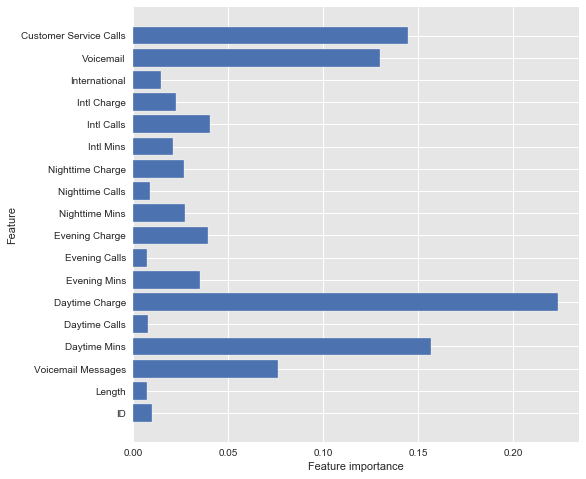

In [234]:
feature_imp = plot_feature_importances(forest)

# Model #5: Decision Trees with scikit-learn

In [187]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

,ID_0,ID_1,ID_2,ID_4,ID_7,ID_9,ID_10,ID_11,ID_12,ID_13,...,Customer Service Calls_0,Customer Service Calls_1,Customer Service Calls_2,Customer Service Calls_3,Customer Service Calls_4,Customer Service Calls_5,Customer Service Calls_6,Customer Service Calls_7,Customer Service Calls_8,Customer Service Calls_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


- Train the tree:

In [188]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(random_state=10)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

- Evalaute predictive performance:

In [189]:
y_pred = clf.predict(X_test)

In [190]:
# Calculate accuracy 
dt_acc = accuracy_score(y_test,y_pred)
print('Accuracy is: {0}'.format(round(dt_acc, 2)))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
dt_roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(dt_roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is: 0.85

AUC is: 0.85

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,529,108,637
1,85,588,673
All,614,696,1310


# Model #6: Regression with CART Trees

In [191]:
regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [192]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3511522859942604
Mean Squared Error: 0.18272390040079192
Root Mean Squared Error: 0.4274621625369805


# Model #7A: Hyperparameter Tuning

- Train a vanilla classifier:

In [193]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

- Make predictions:

In [194]:
y_pred = dt.predict(X_test)

In [195]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8600528107002317

- Maximum Tree Depth:

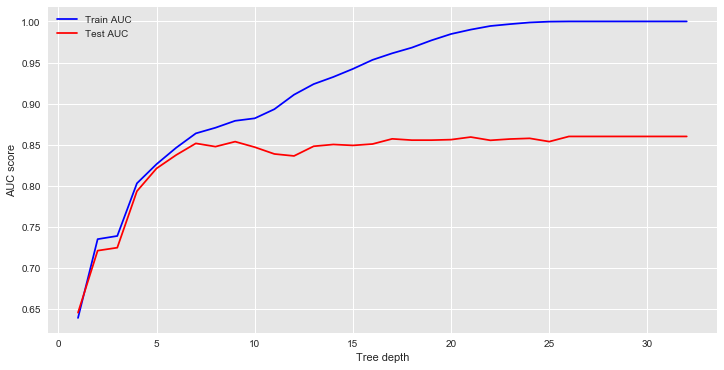

In [196]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

- Minimum Sample Split:

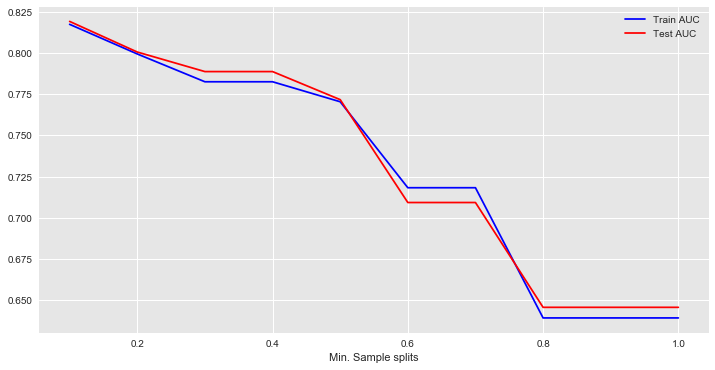

In [197]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

- Minimum Sample Leafs:

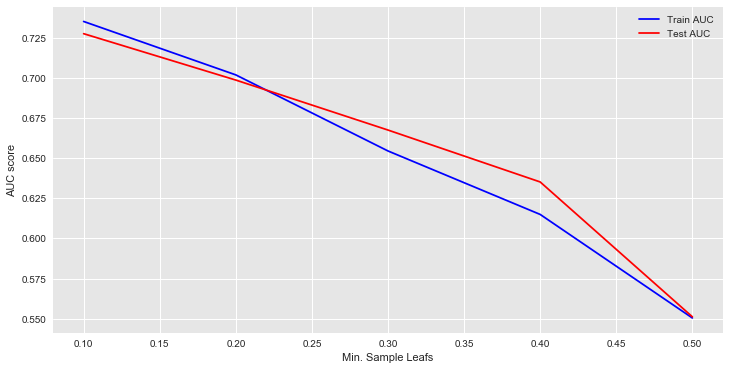

In [198]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

- Maximum Features:

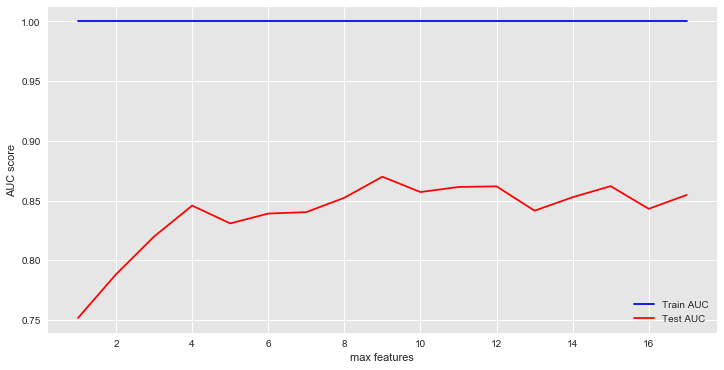

In [199]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

- Re-training the classifier:

In [200]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state=42)
dt.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8547682417349154

# Model #7B: More Hyperparameter Tuning

In [201]:
# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error(y_true, y_predict)
    
    # Return the score
    return [r2, mse]

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [203]:
regressor = DecisionTreeRegressor(random_state=45)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

score = performance(y_test, y_pred)
score

[0.4144304490690033, 0.06873977086743044]

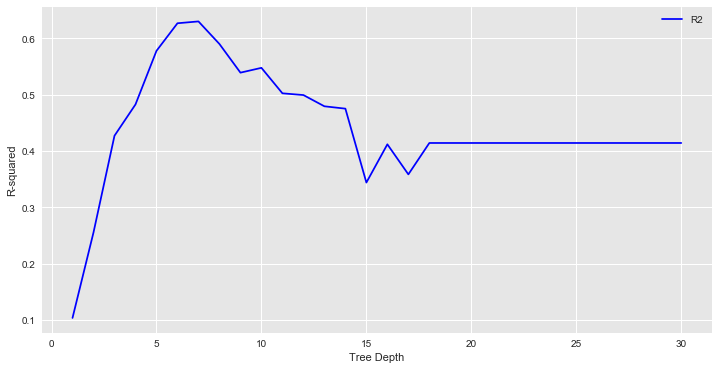

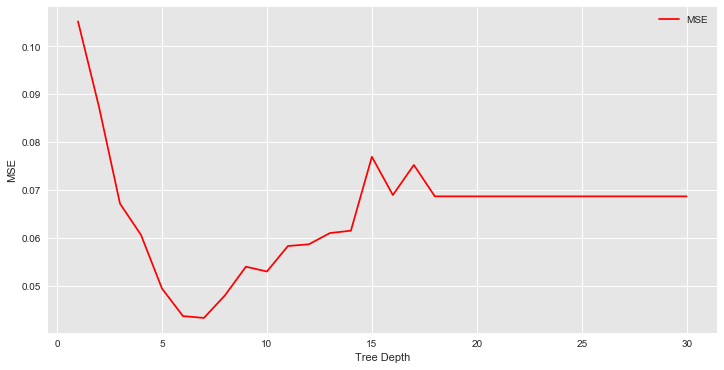

In [204]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

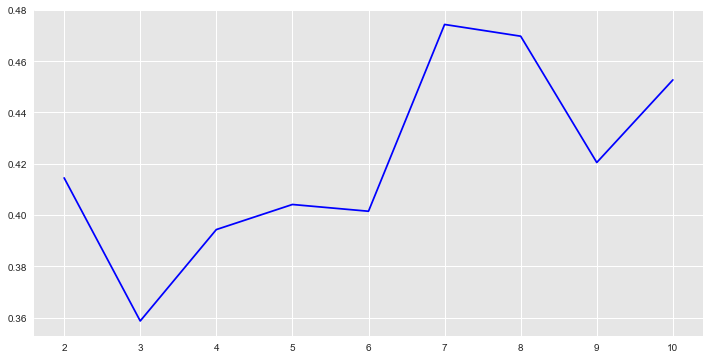

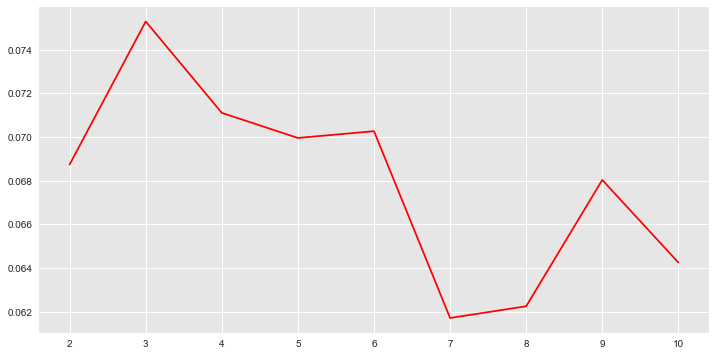

In [205]:
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.show()

In [206]:
regressor = DecisionTreeRegressor(min_samples_split=5, max_depth=6, random_state=45)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = performance(y_test, y_pred)
score[0], score[1], regressor

(0.6270504255791673,
 0.04378039850267885,
 DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=45))

# Model #8: Logistic Regressions

- Build a logistic regression model:

In [241]:
from sklearn.linear_model import LogisticRegression

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

- Create an accuracy functino:

In [242]:
def accuracy(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

- Celculate the accuracy:

In [248]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))

Training Accuracy:  0.8574938574938575
Testing Accuracy:  0.8805237315875614


In [249]:
log_reg_acc = accuracy(y_test, y_hat_test)

# VII. Evaluation

In [250]:
m = {'Algorithm': ['XGBoost', 'Gradient Boosting', 'GridSearch CV - Decision Trees', 'GridSearch CV - Random Forest', 'Tree Ensembles - Decision Trees', 'Tree Ensembles - Bagged Trees', 'Tree Ensembles - Random Forest', 'Decision Trees w/ Scikit Learn', 'Logistic Regression'], 'Accuracy': [xgb_acc, gbt_acc, dt_score, rf_score, dt_ensemble_acc, bt_score, ran_forest_acc, dt_acc, log_reg_acc]}
models = pd.DataFrame(data=m)

In [251]:
models = models.sort_values(by='Accuracy', ascending=False)
models

,Algorithm,Accuracy
3,GridSearch CV - Random Forest,0.900000
1,Gradient Boosting,0.881679
8,Logistic Regression,0.880524
0,XGBoost,0.864122
2,GridSearch CV - Decision Trees,0.861069
7,Decision Trees w/ Scikit Learn,0.852672
5,Tree Ensembles - Bagged Trees,0.845038
4,Tree Ensembles - Decision Trees,0.818321
6,Tree Ensembles - Random Forest,0.816794


# VIII. Conclusion

- Deployment:
    - "How did you pick the question(s) that you did?"
    - "Why are these questions important from a business perspective?"
    - "How did you decide on the data cleaning options you performed?"
    - "Why did you choose a given method or library?"
    - "Why did you select those visualizations and what did you learn from each of them?"
    - "Why did you pick those features as predictors?"
    - "How would you interpret the results?"
    - "How confident are you in the predictive quality of the results?"
    - "What are some of the things that could cause the results to be wrong?"

## A) Accuracy Scores

In [216]:
models

,Algorithm,Accuracy
3,GridSearch CV - Random Forest,0.900000
1,Gradient Boosting,0.881679
0,XGBoost,0.864122
2,GridSearch CV - Decision Trees,0.861069
7,Decision Trees w/ Scikit Learn,0.852672
5,Tree Ensembles - Bagged Trees,0.845038
4,Tree Ensembles - Decision Trees,0.818321
6,Tree Ensembles - Random Forest,0.816794


## B) Model Performance

In [232]:
models[0:2]

,Algorithm,Accuracy
3,GridSearch CV - Random Forest,0.900000
1,Gradient Boosting,0.881679


### Our best performing model was GridSearch CV - Random Forest, which used an ensemble learning method to achieve an accuracy of 90%.

### Our next best performing model was Gradient Boosting, which used an additive/sequential method to achieve an accuracy of 88%.

## C) Feature Importance

### Our models reveal the following features as being the most consequential when it comes to determining or predicting whether a customer will churn:

### 1. *Daytime Charge*
### 2. *Daytime Mins*
### 3. *Customer Service Calls*
### 4. *Voicemail*

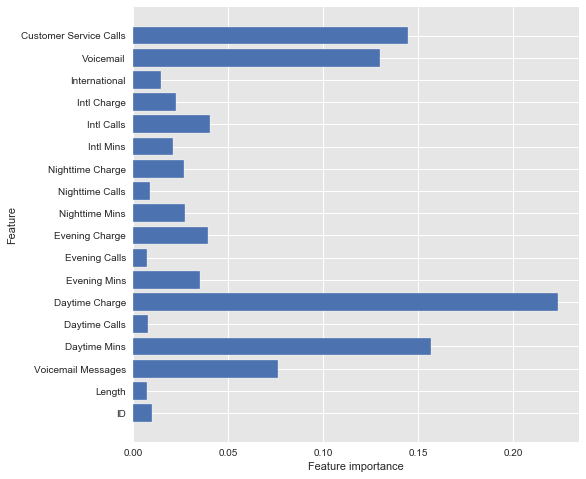

In [239]:
feature_imp = plot_feature_importances(forest)

## D) Recommendations

**Model to use:** GridSearch CV - Random Forest

**Business Implications:** 
   - Pricing - Syriatel should evaluate the cost of daytime minutes since we detected a significant correlation between how much customer were charged for daytime calls and churn.
   
   
   - Customer service - Syriatel should invest more heavily into customer service, particularly conflict resolution since we identified a strong linkage between a relatively high number of customer service calls and churn.
   
   
   - Voicemail - Syriatel should conduct a thorough look at voicemail, particularly since this seems to be an important features for customers and we discovered a connection between churned customers and voicemail plans.
   
**Future Work:** 
   - Market Research - Setup calls with churned and current customers to get a better sense of what they do and do not desire in the product
   - Competitive Research - Take a deep look at competitor pricing, particularly for daytime phone service since it seems churned customers are finding viable alternatives